## imports

In [1]:
import torch

from torchvision.models import inception_v3, Inception_V3_Weights

from deepdream.deepdream import ObjectiveHook, DeepDream
from deepdream.helper_function.utils import (
    img_to_tensor,
    display_img,
    HTMLImageDisplayer,
    create_logger,
)

logger = create_logger(__name__)

## environment_setup

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## starting with random img for now

In [3]:
initial_img = img_to_tensor("deepdream/data/YellowLabradorLooking_new.jpg")
# initial_img = img_to_tensor("/home/shailja/Pictures/new_3.JPG")

In [4]:
initial_img.shape, initial_img.min(), initial_img.max()

(torch.Size([1, 3, 577, 700]), tensor(-1.), tensor(1.))

In [5]:
img_dis = HTMLImageDisplayer()

In [6]:
initial_img.shape

torch.Size([1, 3, 577, 700])


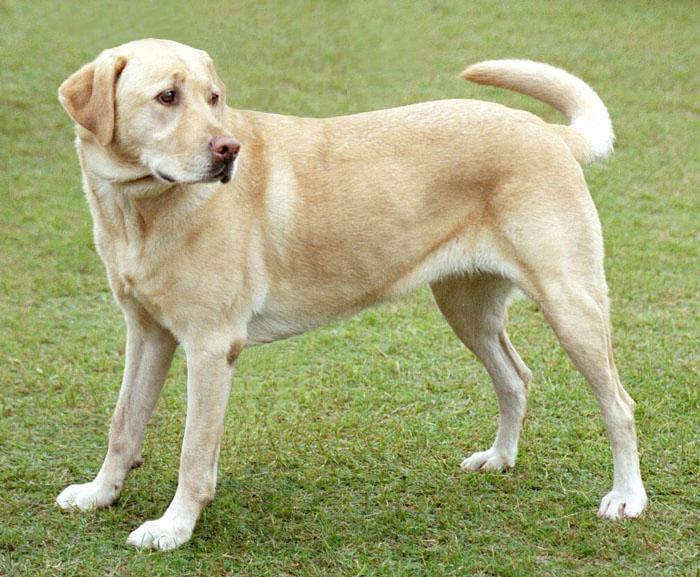

In [7]:
img_dis.clear()
img_dis.update_image(initial_img, "Initial Image")

## load model

In [8]:
model = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1).to(device)
# model = torchvision.models.inception_v3(pretrained=True).to(device)

### Create Objective

In [9]:
mixed_3 = ["Conv2d_3b_1x1"]
mixed_5 = ["Mixed_5b", "Mixed_5c", "Mixed_5d"]

# layers_to_hook = mixed_3 + mixed_5

objective_1 = ObjectiveHook(model, mixed_3, device)
objective_2 = ObjectiveHook(model, mixed_5, device)

objective = objective_1 + objective_2

### DeepDream

In [10]:
dream = DeepDream(initial_img, objective_1, device)

In [11]:
initial_img.shape

torch.Size([1, 3, 577, 700])


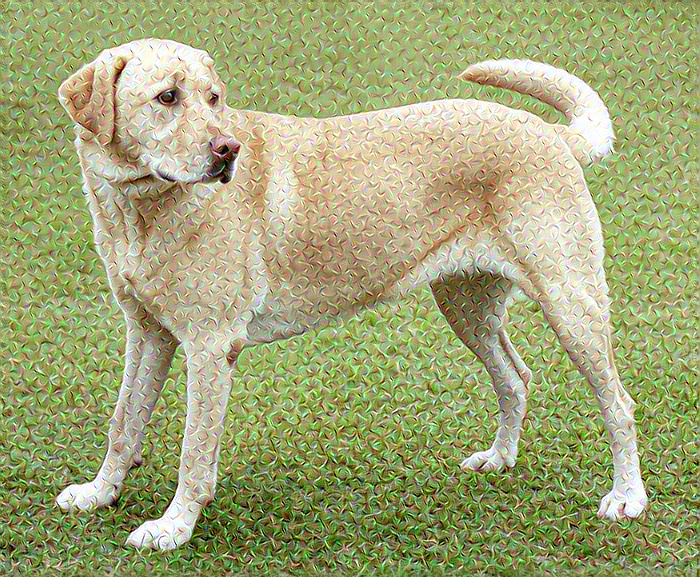

In [12]:
dreamed_img = dream.deep_dream(iterations=100)